# Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
import pickle

# Загрузка данных

In [2]:
ga_hits= pd.read_csv('ga_hits.csv')
ga_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [3]:
ga_sessions = pd.read_csv('ga_sessions.csv', low_memory=False) 
ga_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


# Data Preparation

## EDA

### Удаление дубликатов, пропусков и неинформативных атрибутов

In [4]:
# Просмотр информации о данных
print("Информация о GA Sessions:")
print(ga_sessions.info())
print("\nИнформация о GA Hits:")
print(ga_hits.info())

Информация о GA Sessions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB
None

Информация о GA Hits:
<class 'pandas.core.

In [5]:
# Просмотр размера датасетов
print(ga_hits.shape)
print(ga_sessions.shape)

(15726470, 11)
(1860042, 18)


In [6]:
# Просмотр описания данных
print("Описание GA Sessions:")
print(ga_sessions.visit_number.describe().apply(lambda x: f"{x:0.3f}"))
print("\nОписание GA Hits:")
print(ga_hits.hit_time.describe().apply(lambda x: f"{x:0.3f}"))
print(ga_hits.hit_number.describe().apply(lambda x: f"{x:0.3f}"))

Описание GA Sessions:
count    1860042.000
mean           2.713
std           11.829
min            1.000
25%            1.000
50%            1.000
75%            2.000
max          564.000
Name: visit_number, dtype: object

Описание GA Hits:
count     6566148.000
mean       209104.989
std        403210.972
min             0.000
25%         24120.000
50%         89941.000
75%        219535.250
max      13156885.000
Name: hit_time, dtype: object
count    15726470.000
mean           23.567
std            28.877
min             1.000
25%             7.000
50%            15.000
75%            29.000
max           500.000
Name: hit_number, dtype: object


In [7]:
# Просмотр датасета на наличие дубликатов
print(ga_hits.duplicated().sum())
print(ga_sessions.duplicated().sum())

0
0


<Axes: >

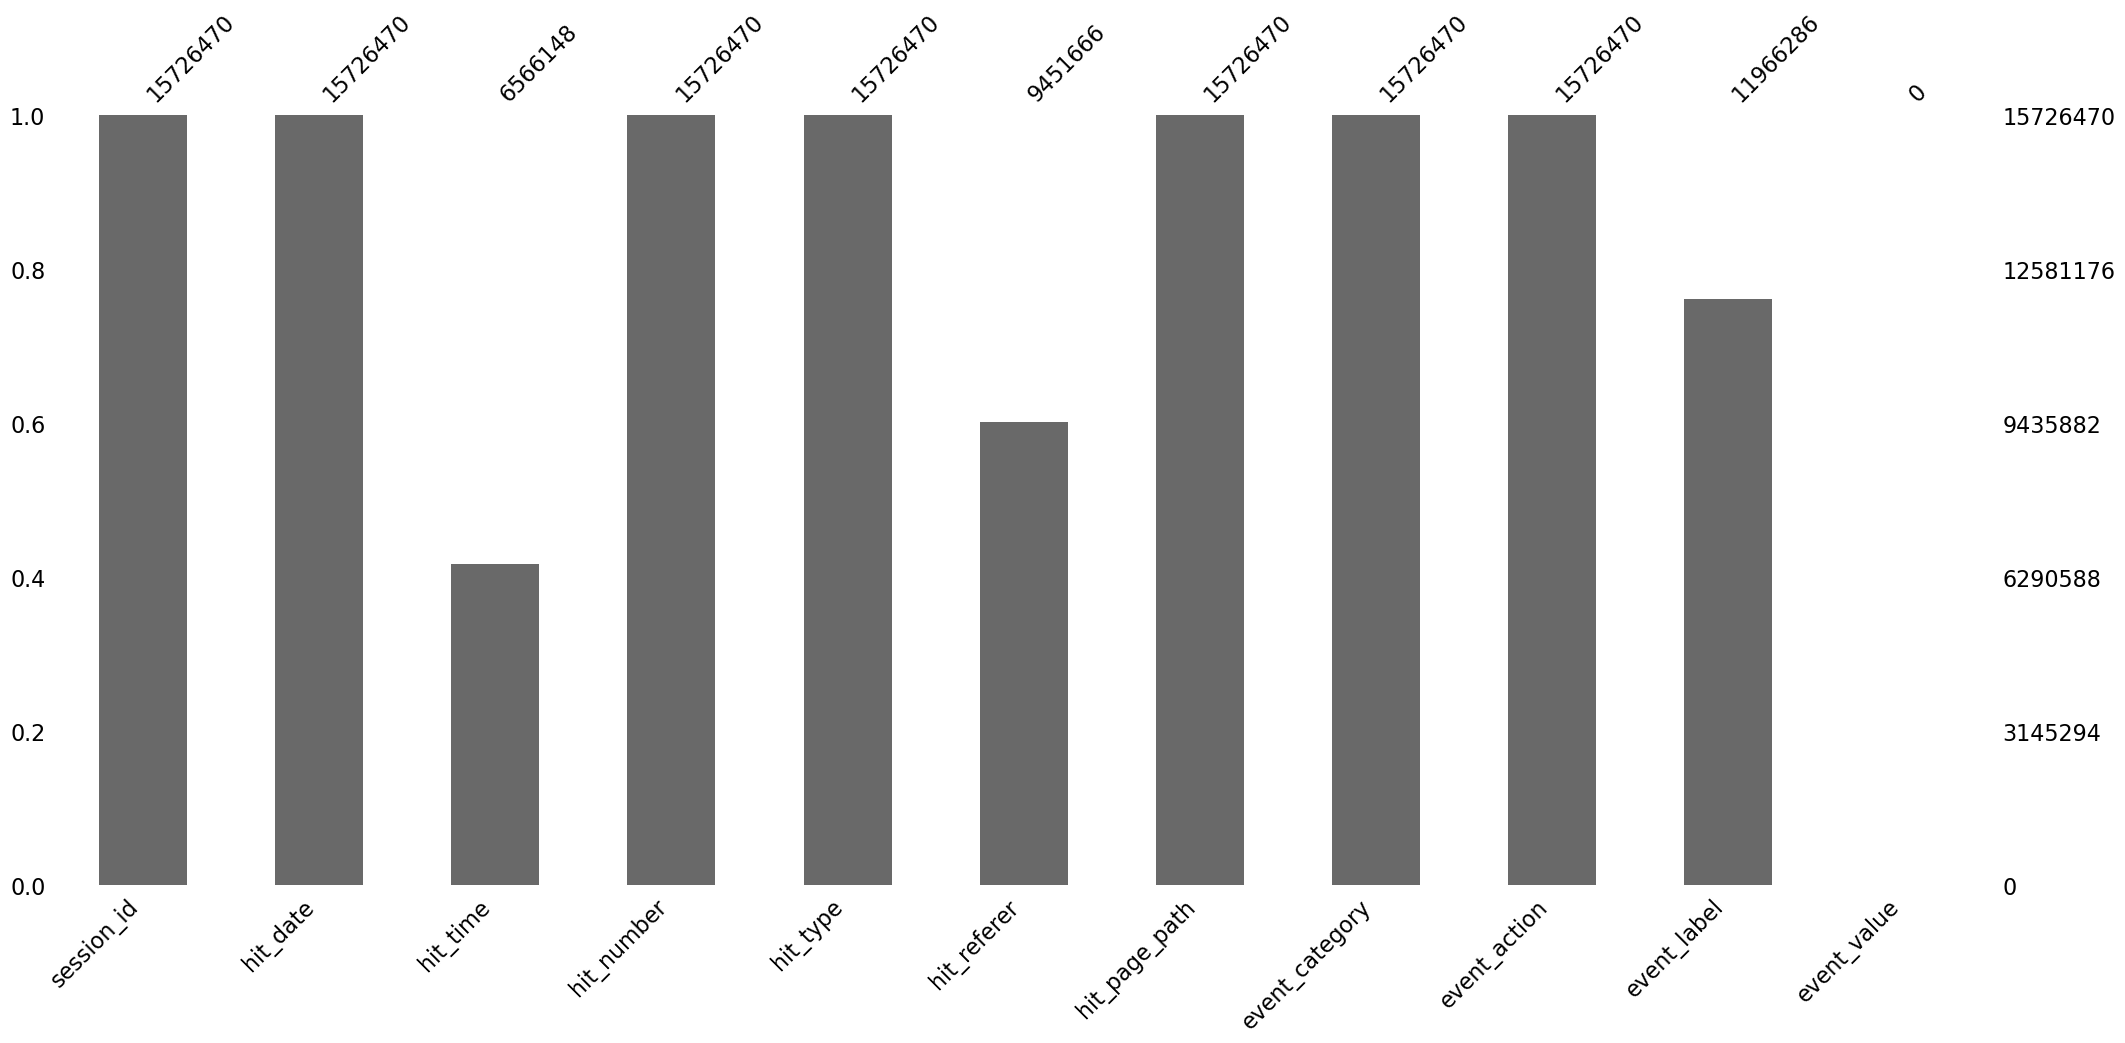

In [8]:
# Построим график для определения заполненности датасета ga_hits
msno.bar(ga_hits)

In [9]:
# Просмотр процентов пропущенных значений по датасету ga_hits
missing_values = ((ga_hits.isna().sum() / len(ga_hits)) * 100).sort_values()
print('Процент пропущенных значений в ga_hits: ')
missing_values

Процент пропущенных значений в ga_hits: 


session_id          0.000000
hit_date            0.000000
hit_number          0.000000
hit_type            0.000000
hit_page_path       0.000000
event_category      0.000000
event_action        0.000000
event_label        23.909905
hit_referer        39.899634
hit_time           58.247795
event_value       100.000000
dtype: float64

<Axes: >

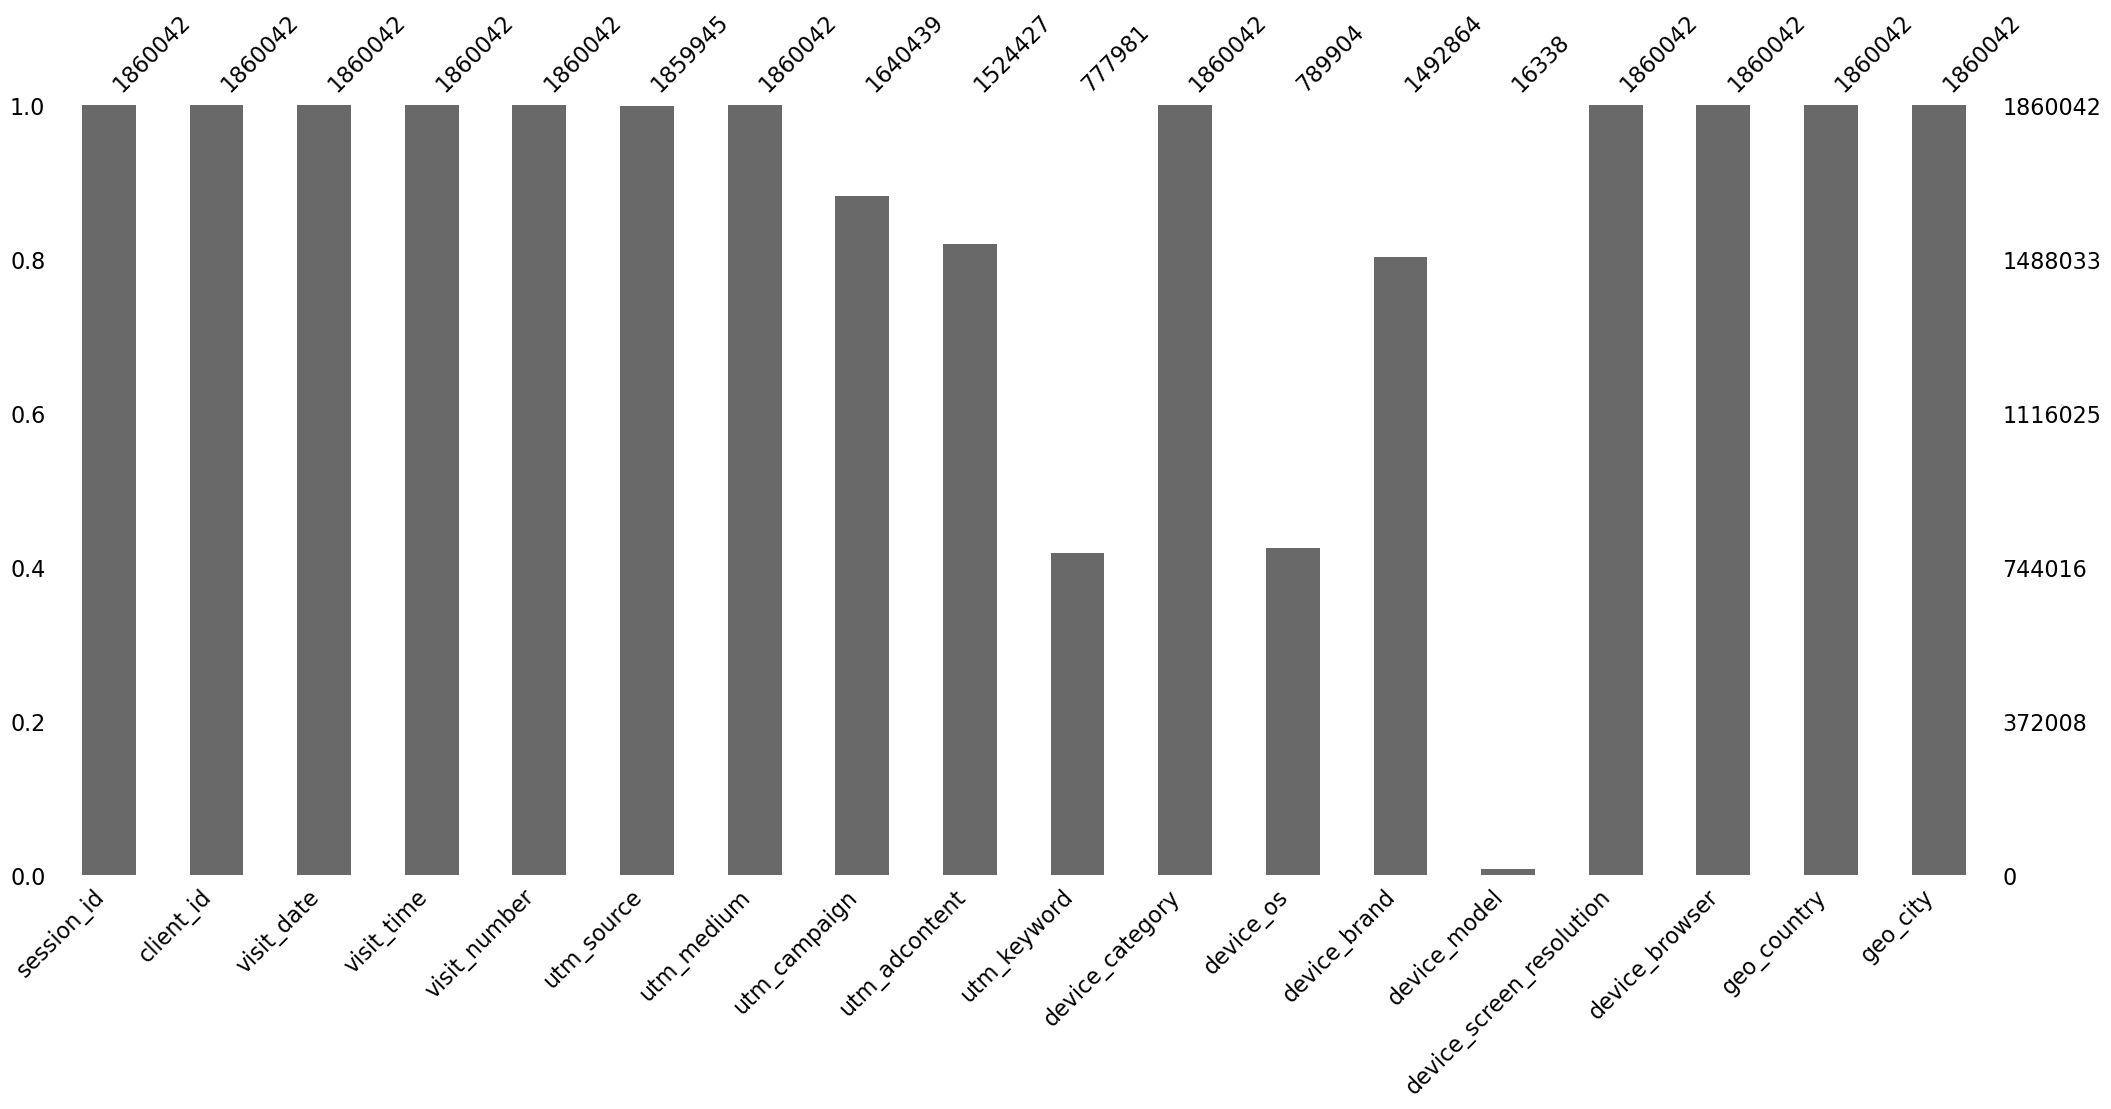

In [10]:
# Построим график для определения заполненности датасета ga_sessions
msno.bar(ga_sessions)

In [11]:
# Просмотр процентов пропущенных значений по датасету ga_sessions
missing_values = ((ga_sessions.isna().sum() / len(ga_sessions)) * 100).sort_values()
print('Процент пропущенных значений в ga_sessions: ')
missing_values

Процент пропущенных значений в ga_sessions: 


session_id                   0.000000
device_browser               0.000000
device_screen_resolution     0.000000
device_category              0.000000
geo_country                  0.000000
utm_medium                   0.000000
geo_city                     0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
client_id                    0.000000
utm_source                   0.005215
utm_campaign                11.806346
utm_adcontent               18.043410
device_brand                19.740307
device_os                   57.533002
utm_keyword                 58.174009
device_model                99.121633
dtype: float64

In [12]:
# Удаление ненужных атрибутов
ga_sessions.drop(['utm_keyword', 'device_os', 'device_model'], axis=1, inplace=True)
ga_hits.drop(['event_label', 'event_value'], axis=1, inplace=True)

In [13]:
# Список столбцов, в которых нужно удалить пропуски
columns_to_check = ['utm_source', 'utm_campaign', 'utm_adcontent', 'device_brand']

In [14]:
# Удаление строк с пропусками в указанных столбцах
ga_sessions = ga_sessions.dropna(subset=columns_to_check)

In [15]:
# Функция для заполнения пропусков самым частым значением
def fill_most_frequent(series):
    most_frequent_value = series.mode().iloc[0]
    return series.fillna(most_frequent_value)

In [16]:
# Применение функции к каждому столбцу в ga_hits
ga_hits = ga_hits.apply(fill_most_frequent)

In [17]:
# Проверка результата
print("Пропущенные значения в ga_sessions после обработки:")
print(ga_sessions.isnull().sum())
print("\nПропущенные значения в ga_hits после обработки:")
print(ga_hits.isnull().sum())

Пропущенные значения в ga_sessions после обработки:
session_id                  0
client_id                   0
visit_date                  0
visit_time                  0
visit_number                0
utm_source                  0
utm_medium                  0
utm_campaign                0
utm_adcontent               0
device_category             0
device_brand                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
dtype: int64

Пропущенные значения в ga_hits после обработки:
session_id        0
hit_date          0
hit_time          0
hit_number        0
hit_type          0
hit_referer       0
hit_page_path     0
event_category    0
event_action      0
dtype: int64


In [18]:
# Приведение данных к нужному типу
ga_sessions['visit_date'] = pd.to_datetime(ga_sessions['visit_date'])
ga_hits['hit_date'] = pd.to_datetime(ga_hits['hit_date'])

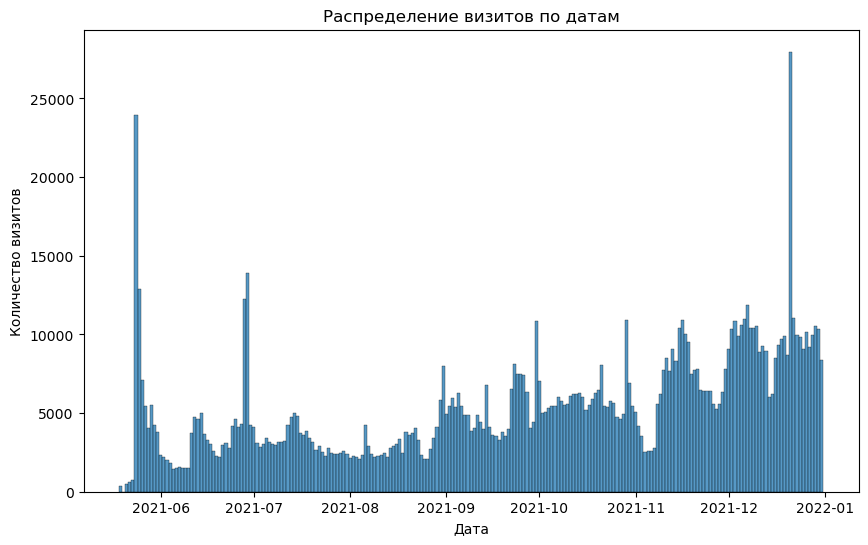

In [19]:
# Распределение визитов по датам
plt.figure(figsize=(10, 6))
sns.histplot(ga_sessions['visit_date'].dt.date, bins=30)
plt.title('Распределение визитов по датам')
plt.xlabel('Дата')
plt.ylabel('Количество визитов')
plt.show()

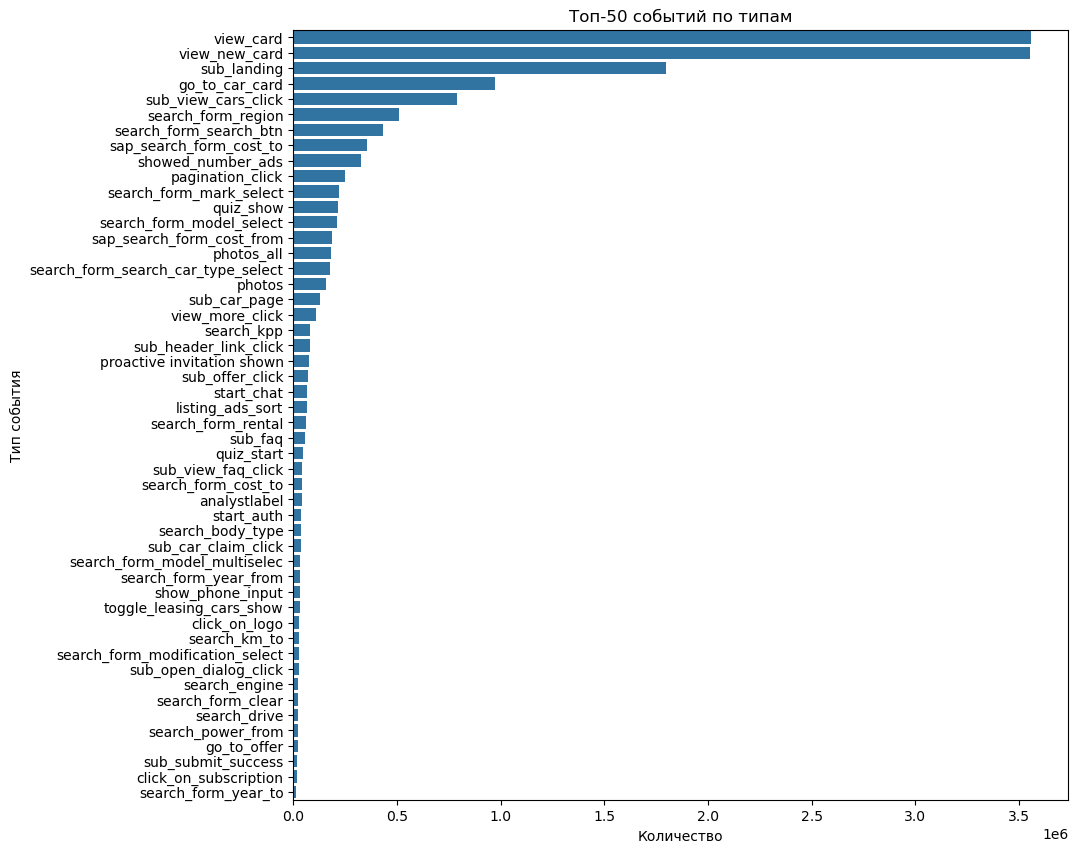

In [20]:
# Определим топ-50 наиболее часто встречающихся типов событий
top_n = 50
top_event_actions = ga_hits['event_action'].value_counts().nlargest(top_n).index

# Фильтруем данные, чтобы оставить только топ-N типов событий
filtered_ga_hits = ga_hits[ga_hits['event_action'].isin(top_event_actions)]

# Создаем график
plt.figure(figsize=(10, 10))
sns.countplot(y=filtered_ga_hits['event_action'], order=top_event_actions)
plt.title(f'Топ-{top_n} событий по типам')
plt.xlabel('Количество')
plt.ylabel('Тип события')
plt.show()

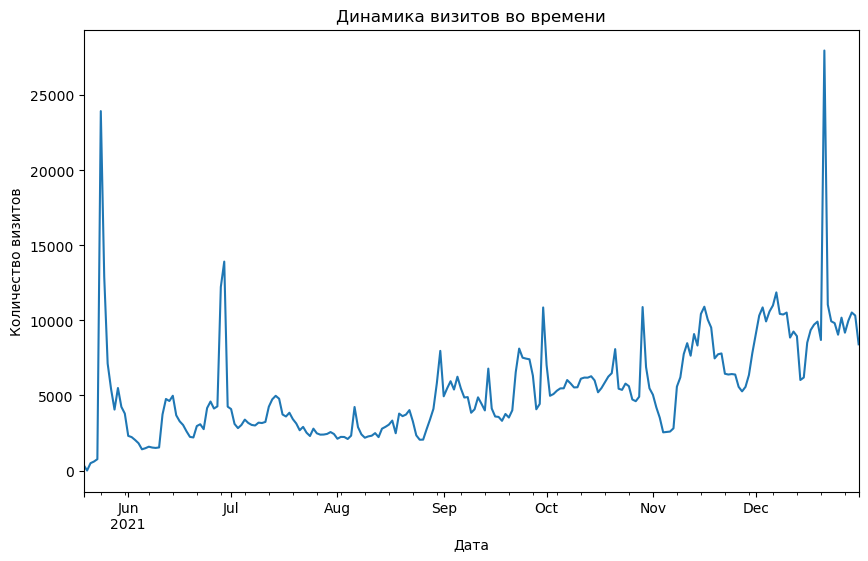

In [21]:
# Динамика визитов во времени
plt.figure(figsize = (10, 6))
ga_sessions.set_index('visit_date')['session_id'].resample('D').count().plot()
plt.title('Динамика визитов во времени')
plt.xlabel('Дата')
plt.ylabel('Количество визитов')
plt.show()

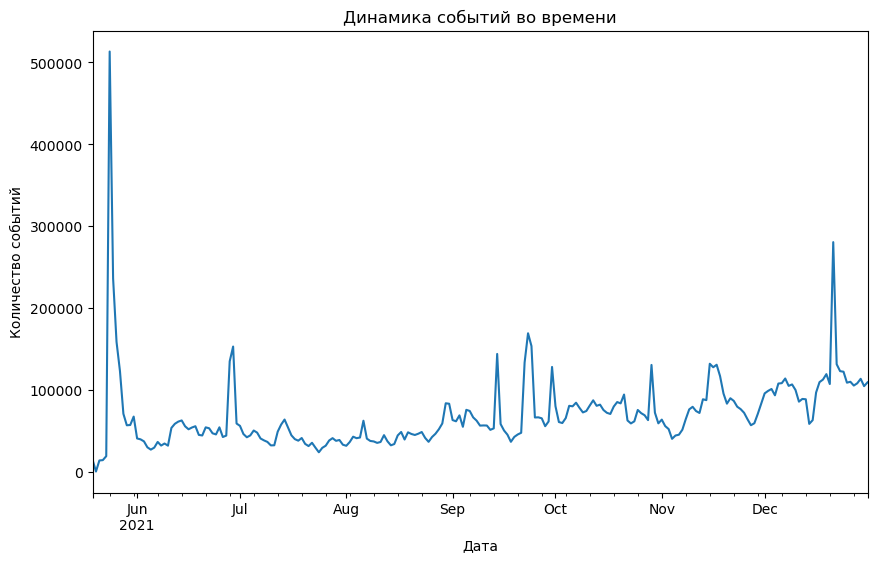

In [22]:
# Динамика событий во времени
plt.figure(figsize = (10, 6))
ga_hits.set_index('hit_date')['hit_number'].resample('D').count().plot()
plt.title('Динамика событий во времени')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.show()

### Создание нового атрибута

In [23]:
# Функция для проверки формата столбца device_screen_resolution
def check_resolution_format(resolution):
    if pd.isna(resolution):
        return False
    parts = resolution.split('x')
    return len(parts) == 2 and all(part.isdigit() for part in parts)

In [24]:
# Применение функции к столбцу
ga_sessions['valid_resolution'] = ga_sessions['device_screen_resolution'].apply(check_resolution_format)

In [25]:
# Вывод несоответствующих значений
invalid_resolutions = ga_sessions[~ga_sessions['valid_resolution']]
print("Несоответствующие значения в столбце device_screen_resolution:")
print(invalid_resolutions[['device_screen_resolution']])

Несоответствующие значения в столбце device_screen_resolution:
        device_screen_resolution
130171                 (not set)
210759                 (not set)
229786                 (not set)
291016                 (not set)
354463                 (not set)
470835                 (not set)
1202981                (not set)
1592121                (not set)


In [26]:
# Удаление несоответствующих значений
ga_sessions = ga_sessions[ga_sessions['valid_resolution']]

In [27]:
# Удаление временного столбца
ga_sessions.drop(columns=['valid_resolution'], inplace=True)

In [28]:
# Функция для разделения строки и преобразования в числа
def split_resolution(resolution):
    width, height = resolution.split('x')
    return int(width), int(height)

In [29]:
# Применение функции к столбцу
ga_sessions[['device_screen_width', 'device_screen_height']] = ga_sessions['device_screen_resolution'].apply(
    lambda x: pd.Series(split_resolution(x))
)

In [30]:
# Удаление столбца
ga_sessions.drop(columns=['device_screen_resolution'], inplace=True)

In [31]:
# Список целевых действий
target_actions = ['sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click', 
                  'sub_custom_question_submit_click', 'sub_call_number_click', 'sub_callback_submit_click', 
                  'sub_submit_success', 'sub_car_request_submit_click']

In [32]:
# Создание целевой переменной
ga_hits['target_action'] = ga_hits['event_action'].isin(target_actions).astype(int)

In [33]:
# Группировка по session_id и суммирование целевых действий
target_df = ga_hits.groupby('session_id')['target_action'].sum().reset_index()
target_df['target_action'] = (target_df['target_action'] > 0).astype(int)

In [34]:
# Объединение с основным датасетом
ga_sessions = ga_sessions.merge(target_df, on='session_id', how='left')
ga_sessions['target_action'].fillna(0, inplace=True)

In [35]:
# Проверка датасета
ga_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_browser,geo_country,geo_city,device_screen_width,device_screen_height,target_action
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,Chrome,Russia,Zlatoust,360,720,0.0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,Samsung Internet,Russia,Moscow,385,854,0.0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,Chrome,Russia,Krasnoyarsk,360,720,0.0
3,9055447192389856083.1622453074.1622453074,2108385598.1622453075,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,Safari,Russia,Saint Petersburg,375,812,0.0
4,9055455318486370642.1640843788.1640843788,2108387490.1640843602,2021-12-30,08:56:28,1,TxKUcPpthBDPieTGmVhx,cpc,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,tablet,Lenovo,YaBrowser,Russia,Saint Petersburg,602,1029,0.0


### Аномалии и выбросы

In [36]:
# Функция для удаления выбросов
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

In [37]:
# Применение функции к числовому столбцу в ga_sessions device_screen_width
boundaries_width = calculate_outliers(ga_sessions.device_screen_width)
boundaries_width

(282.0, 490.0)

In [38]:
# Применение функции к числовому столбцу в ga_sessions device_screen_height
boundaries_height = calculate_outliers(ga_sessions.device_screen_height)
boundaries_height

(530.5, 1078.5)

In [39]:
# Определяем все строки относящиеся к выбросам
is_outlier_w = (ga_sessions.device_screen_width < boundaries_width[0]) | (ga_sessions.device_screen_width > boundaries_width[1])
is_outlier_w

0          False
1          False
2          False
3          False
4           True
           ...  
1230846    False
1230847    False
1230848    False
1230849    False
1230850    False
Name: device_screen_width, Length: 1230851, dtype: bool

In [40]:
# Определяем все строки относящиеся к выбросам
is_outlier_h = (ga_sessions.device_screen_height < boundaries_height[0]) | (ga_sessions.device_screen_height > boundaries_height[1])
is_outlier_h

0          False
1          False
2          False
3          False
4          False
           ...  
1230846    False
1230847    False
1230848    False
1230849    False
1230850    False
Name: device_screen_height, Length: 1230851, dtype: bool

In [41]:
# Определяем количество выбросов
is_outlier_w.sum() / len(ga_sessions.device_screen_width)

0.04361047762889253

In [42]:
# Определяем количество выбросов
is_outlier_h.sum() / len(ga_sessions.device_screen_height)

0.034584202312058894

In [43]:
# Просмотр выбросов
ga_sessions[is_outlier_w]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_browser,geo_country,geo_city,device_screen_width,device_screen_height,target_action
4,9055455318486370642.1640843788.1640843788,2108387490.1640843602,2021-12-30,08:56:28,1,TxKUcPpthBDPieTGmVhx,cpc,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,tablet,Lenovo,YaBrowser,Russia,Saint Petersburg,602,1029,0.0
84,9055992782094443407.1631429519.1631429519,2108512628.1631429519,2021-09-12,09:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,mobile,Samsung,Chrome,Russia,Moscow,846,412,0.0
88,9056026669390561369.1635582042.1635582042,2108520518.1635582041,2021-10-30,11:20:42,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Realme,Chrome,Russia,Moscow,800,360,0.0
96,9056085149659660564.1629992938.1629992938,2108534134.1629978900,2021-08-26,18:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,dUuXlWzvmhDSyclWRhNP,mobile,Samsung,Samsung Internet,Russia,Saint Petersburg,753,339,0.0
173,9056635068685915980.1633589069.1633589069,2108662172.1633589068,2021-10-07,09:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,Safari,United States,Prineville,2000,2000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230807,9055143379303248722.1637462866.1637462866,2108314861.1637462866,2021-11-21,05:47:46,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Xiaomi,Chrome,Russia,Saint Petersburg,851,393,0.0
1230811,9055159773190753216.1634798531.1634798531,2108318678.1634798528,2021-10-21,09:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Xiaomi,YaBrowser,Russia,Moscow,873,393,0.0
1230815,9055195193792223328.1640978536.1640978536,2108326925.1640978528,2021-12-31,22:22:16,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,mobile,Xiaomi,Chrome,Russia,Ulyanovsk,800,600,0.0
1230840,9055349030922605117.1632752193.1632752193,2108362743.1632752189,2021-09-27,17:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,mobile,BQ,YaBrowser,Russia,Saint Petersburg,640,360,0.0


In [44]:
# Просмотр выбросов
ga_sessions[is_outlier_h]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_browser,geo_country,geo_city,device_screen_width,device_screen_height,target_action
84,9055992782094443407.1631429519.1631429519,2108512628.1631429519,2021-09-12,09:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,mobile,Samsung,Chrome,Russia,Moscow,846,412,0.0
88,9056026669390561369.1635582042.1635582042,2108520518.1635582041,2021-10-30,11:20:42,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Realme,Chrome,Russia,Moscow,800,360,0.0
96,9056085149659660564.1629992938.1629992938,2108534134.1629978900,2021-08-26,18:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,dUuXlWzvmhDSyclWRhNP,mobile,Samsung,Samsung Internet,Russia,Saint Petersburg,753,339,0.0
173,9056635068685915980.1633589069.1633589069,2108662172.1633589068,2021-10-07,09:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,Safari,United States,Prineville,2000,2000,0.0
185,9056715015206166402.1632591781.1632591781,2108680786.1632591746,2021-09-25,20:00:00,1,RmEBuqrriAfAVsLQQmhk,cpc,iYBYglGljMDRQyqHRiPH,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,Chrome,Russia,Moscow,640,360,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230807,9055143379303248722.1637462866.1637462866,2108314861.1637462866,2021-11-21,05:47:46,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Xiaomi,Chrome,Russia,Saint Petersburg,851,393,0.0
1230811,9055159773190753216.1634798531.1634798531,2108318678.1634798528,2021-10-21,09:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Xiaomi,YaBrowser,Russia,Moscow,873,393,0.0
1230839,9055349000865826584.1640744740.1640744740,2108362736.1640744728,2021-12-29,05:25:40,1,TxKUcPpthBDPieTGmVhx,cpc,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,mobile,Xiaomi,Chrome,Russia,Moscow,464,1123,0.0
1230840,9055349030922605117.1632752193.1632752193,2108362743.1632752189,2021-09-27,17:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,mobile,BQ,YaBrowser,Russia,Saint Petersburg,640,360,0.0


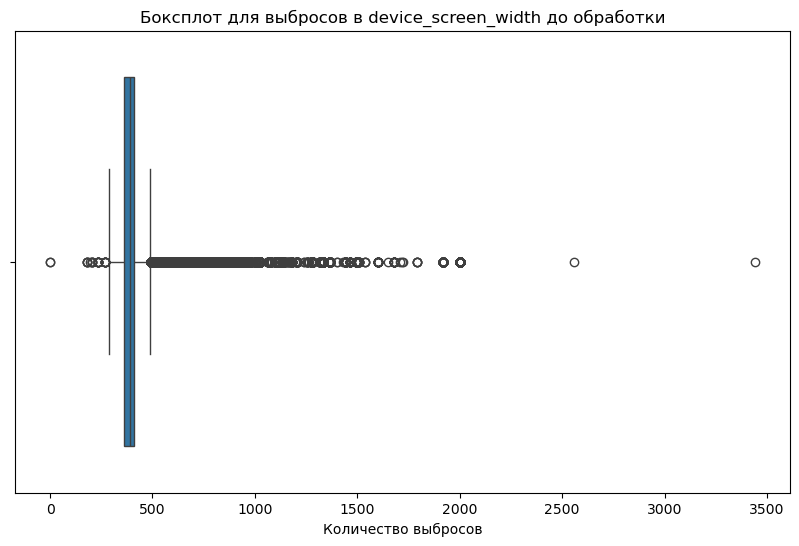

In [45]:
# Боксплот для device_screen_width до обработки
plt.figure(figsize=(10, 6))
sns.boxplot(x=ga_sessions['device_screen_width'])
plt.title('Боксплот для выбросов в device_screen_width до обработки')
plt.xlabel('Количество выбросов')
plt.show()

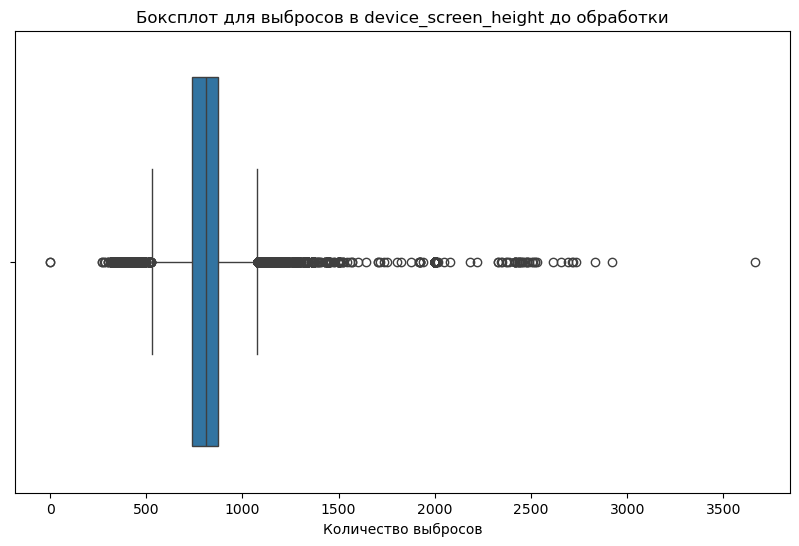

In [46]:
# Боксплот для device_screen_height до обработки
plt.figure(figsize=(10, 6))
sns.boxplot(x=ga_sessions['device_screen_height'])
plt.title('Боксплот для выбросов в device_screen_height до обработки')
plt.xlabel('Количество выбросов')
plt.show()

In [47]:
ga_sessions.loc[is_outlier_w, 'device_screen_width'] = int(boundaries_width[1])

In [48]:
ga_sessions.loc[is_outlier_h, 'device_screen_height'] = int(boundaries_height[1])

In [49]:
ga_sessions.loc[is_outlier_h, 'device_screen_height'] = int(boundaries_height[0])

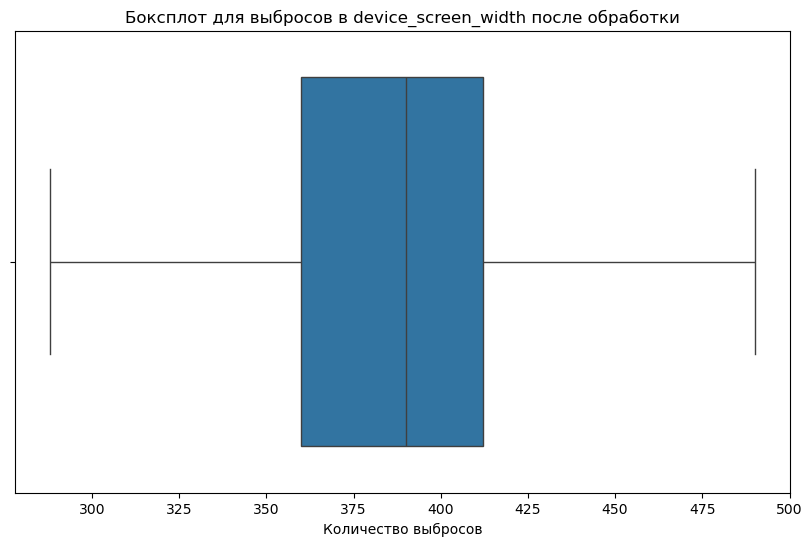

In [50]:
# Боксплот для device_screen_width после обработки
plt.figure(figsize=(10, 6))
sns.boxplot(x=ga_sessions['device_screen_width'])
plt.title('Боксплот для выбросов в device_screen_width после обработки')
plt.xlabel('Количество выбросов')
plt.show()

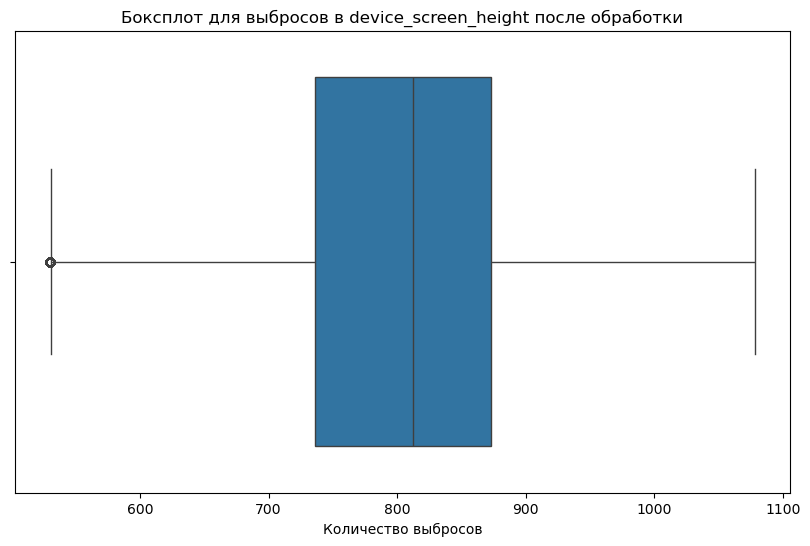

In [51]:
# Боксплот для device_screen_height после обработки
plt.figure(figsize=(10, 6))
sns.boxplot(x=ga_sessions['device_screen_height'])
plt.title('Боксплот для выбросов в device_screen_height после обработки')
plt.xlabel('Количество выбросов')
plt.show()

### Корреляция 

In [52]:
# Выбор числовых атрибутов для корреляционного анализа
numeric_features = ['visit_number', 'target_action', 'device_screen_width', 'device_screen_height']
numeric_ga_sessions = ga_sessions[numeric_features]

In [53]:
#Расчет корреляциоонной матрицы
corr_matrix = numeric_ga_sessions.corr()

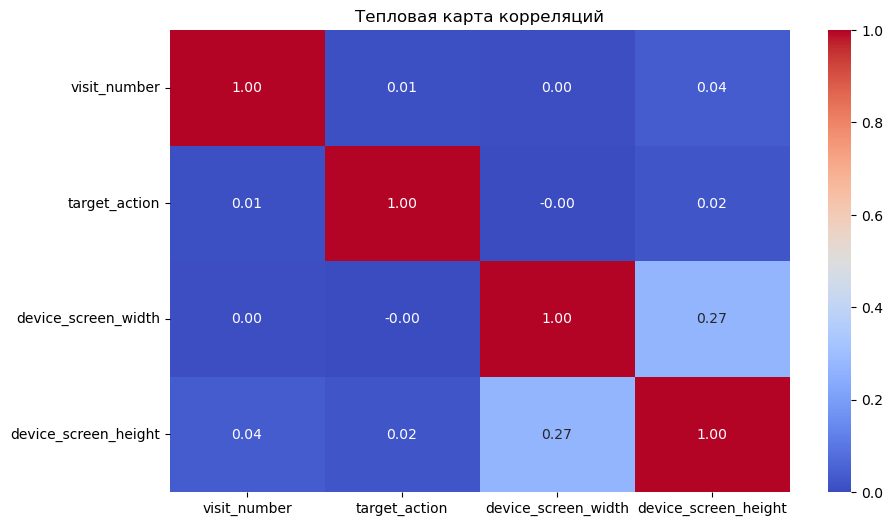

In [54]:
# Построение тепловой карты
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Тепловая карта корреляций')
plt.show()

По данным тепловой карты прослеживается низкий уровень корреляции по числовым атрибутам в датасете ga_sessions.

# Feature engineering

### Удаление столбцов ненужных для моделирования

In [55]:
# Информация по датасету ga_sessions
ga_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230851 entries, 0 to 1230850
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   session_id            1230851 non-null  object        
 1   client_id             1230851 non-null  object        
 2   visit_date            1230851 non-null  datetime64[ns]
 3   visit_time            1230851 non-null  object        
 4   visit_number          1230851 non-null  int64         
 5   utm_source            1230851 non-null  object        
 6   utm_medium            1230851 non-null  object        
 7   utm_campaign          1230851 non-null  object        
 8   utm_adcontent         1230851 non-null  object        
 9   device_category       1230851 non-null  object        
 10  device_brand          1230851 non-null  object        
 11  device_browser        1230851 non-null  object        
 12  geo_country           1230851 non-null  ob

In [56]:
# Удаляем столбцы не нужные для обучения моделей.
ga_sessions.drop(['session_id', 'client_id', 'visit_date', 'visit_time'], axis=1, inplace=True)

In [57]:
sample_indices = np.random.choice(ga_sessions.shape[0], size=int(ga_sessions.shape[0] * 0.1), replace=False)
ga_sessions = ga_sessions.iloc[sample_indices]

In [58]:
# Сохраним целевую переменную в отдельный датафрейм
df_target = ga_sessions['target_action']

In [59]:
# Удаляем целевую переменную из датафрейма с передикторами
ga_sessions.drop('target_action', axis=1, inplace=True)

### Преобразование категориальных данных

In [60]:
# Определяем категориальные переменные
categorical = ['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 'device_category',
               'device_brand', 'device_browser', 'geo_country', 'geo_city']

In [61]:
# Выполним преобразование OneHotEncoding для всех категориальных признаков в датасете
df_onehot = pd.get_dummies(ga_sessions[categorical])

df_onehot.head()

,utm_source_AuJjYKxJakEqFnCmyFtz,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_CFeqZLBNQdYHxJrTOHjY,utm_source_CgsxHpdTmXHvrHqEKRxp,utm_source_DlnuGwaJBHGNEKdWfOpe,utm_source_DnEUulZAecfGPvdtZBYS,utm_source_DnxUhHWInKVDAWzwROOC,utm_source_FNIjOzNNxWDHGSGhdwpo,utm_source_FTAuYVNoYYxgvKMpKSLW,...,geo_city_Zhigulevsk,geo_city_Zhmerynka,geo_city_Zhukovskiy,geo_city_Zipaquira,geo_city_Zlatoust,geo_city_Zolochiv,geo_city_Zug,geo_city_Zurich,geo_city_Zvenigorod,geo_city_Хомутово
656824,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
308760,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
365765,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1102987,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
488173,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
# Удаляем не преобразованные столбцы
ga_sessions = pd.concat([ga_sessions.drop(categorical, axis=1), df_onehot], axis=1)
ga_sessions

,visit_number,device_screen_width,device_screen_height,utm_source_AuJjYKxJakEqFnCmyFtz,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_CFeqZLBNQdYHxJrTOHjY,utm_source_CgsxHpdTmXHvrHqEKRxp,utm_source_DlnuGwaJBHGNEKdWfOpe,utm_source_DnEUulZAecfGPvdtZBYS,...,geo_city_Zhigulevsk,geo_city_Zhmerynka,geo_city_Zhukovskiy,geo_city_Zipaquira,geo_city_Zlatoust,geo_city_Zolochiv,geo_city_Zug,geo_city_Zurich,geo_city_Zvenigorod,geo_city_Хомутово
656824,1,360,800,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
308760,1,360,800,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
365765,1,360,720,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1102987,6,375,667,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
488173,1,414,896,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322369,1,393,873,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
872211,1,360,760,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
746794,1,393,851,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
917768,3,412,846,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Нормализация данных

In [63]:
# Инициализируем StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [64]:
# Масштабируем датасет ga_sessions
ga_sessions = scaler.fit_transform(ga_sessions)

# Modeling

In [65]:
# Определяем переменные для дальнейшего моделирования
x = ga_sessions
y = df_target

In [66]:
# Разделение датасета на тренировачную и тестовую выборку
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Инициализация модели и обучения

In [67]:
# Модель Случайный лес
rf_clf = RandomForestClassifier()

rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [68]:
# Оценка качества модели Случайный лес
predicted_train_rf = rf_clf.predict(x_train)
predicted_test_rf = rf_clf.predict(x_test)
print(accuracy_score(y_train, predicted_train_rf))
print(accuracy_score(y_test, predicted_test_rf))

0.9832170754070961
0.9718355630179277


In [69]:
# Модель Логистическая регрессия
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

LogisticRegression()

In [70]:
# Оценка качества модели Логистическая регрессия
logreg_train = logreg.predict(x_train)
logreg_pred = logreg.predict(x_test)
print(accuracy_score(y_train, logreg_train))
print(accuracy_score(y_test, logreg_pred))

0.9736069360136492
0.9727834046471321


In [71]:
# Модель Многослойный персептрон
mlp = MLPClassifier(random_state=42, max_iter=500)

mlp.fit(x_train, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [73]:
# Оценка качества модели Многослойный персептрон
predict_train_mlp = mlp.predict(x_train)
print(accuracy_score(y_train, predict_train_mlp))
mlp_pred = mlp.predict(x_test)
print(accuracy_score(y_test, mlp_pred))

0.9780173864599171
0.9714293451768402


In [74]:
# Модель XGBoost
xgb_model = xgb.XGBClassifier( eval_metric='logloss', tree_method='hist')

xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [75]:
# Оценка качества модели XGBoost
predict_train_xgb = xgb_model.predict(x_train)
print(accuracy_score(y_train, predict_train_xgb))
xgb_pred = xgb_model.predict(x_test)
print(accuracy_score(y_test, xgb_pred))

0.9733980199398786
0.97481449385257


In [76]:
# Модель LightGBM
lgb_model = lgb.LGBMClassifier(boosting_type='gbdt', n_estimators=100)

lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 2295, number of negative: 83864
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1648
[LightGBM] [Info] Number of data points in the train set: 86159, number of used features: 451
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.026637 -> initscore=-3.598464
[LightGBM] [Info] Start training from score -3.598464


LGBMClassifier()

In [77]:
# Оценка качества модели LightGBM
predict_train_lgb = lgb_model.predict(x_train)
print(accuracy_score(y_train, predict_train_lgb))
lgb_pred = lgb_model.predict(x_test)
print(accuracy_score(y_test, lgb_pred))

0.9734444457340499
0.97481449385257


In [78]:
# Модель CatBoost
ctb_model = CatBoostClassifier(iterations=100, learning_rate=0.1)

ctb_model.fit(x_train, y_train)

0:	learn: 0.5378148	total: 184ms	remaining: 18.2s
1:	learn: 0.4253623	total: 203ms	remaining: 9.96s
2:	learn: 0.3444022	total: 217ms	remaining: 7s
3:	learn: 0.2863474	total: 229ms	remaining: 5.5s
4:	learn: 0.2444322	total: 242ms	remaining: 4.59s
5:	learn: 0.2138525	total: 254ms	remaining: 3.98s
6:	learn: 0.1914160	total: 267ms	remaining: 3.54s
7:	learn: 0.1748514	total: 280ms	remaining: 3.21s
8:	learn: 0.1625710	total: 292ms	remaining: 2.95s
9:	learn: 0.1532631	total: 305ms	remaining: 2.74s
10:	learn: 0.1461882	total: 317ms	remaining: 2.56s
11:	learn: 0.1408123	total: 330ms	remaining: 2.42s
12:	learn: 0.1367231	total: 343ms	remaining: 2.29s
13:	learn: 0.1331194	total: 356ms	remaining: 2.19s
14:	learn: 0.1306310	total: 369ms	remaining: 2.09s
15:	learn: 0.1284331	total: 382ms	remaining: 2.01s
16:	learn: 0.1269567	total: 395ms	remaining: 1.93s
17:	learn: 0.1255967	total: 408ms	remaining: 1.86s
18:	learn: 0.1246121	total: 422ms	remaining: 1.8s
19:	learn: 0.1239344	total: 434ms	remaining: 1

In [79]:
# Оценка качества модели CatBoost
predict_train_ctb = ctb_model.predict(x_train)
print(accuracy_score(y_train, predict_train_ctb))
ctb_pred = ctb_model.predict(x_test)
print(accuracy_score(y_test, ctb_pred))

0.9733632005942502
0.97481449385257


## Переобучение и оценка результатов моделирования

In [80]:
for model in [rf_clf, mlp, logreg, xgb_model, lgb_model, ctb_model]:
    cv_score = cross_val_score(model, x, y, cv=5)
    y_pred_proba = model.predict_proba(x)[:, 1]
    roc_auc = roc_auc_score(y, y_pred_proba)
    print(f'model: {type(model).__name__}, cv_score_mean: {cv_score.mean():.4f}, cv_score_std: {cv_score.std():.4f}, ROC AUC: {roc_auc:.4f}')

model: RandomForestClassifier, cv_score_mean: 0.9706, cv_score_std: 0.0003, ROC AUC: 0.8595
model: MLPClassifier, cv_score_mean: 0.9713, cv_score_std: 0.0004, ROC AUC: 0.8139
model: LogisticRegression, cv_score_mean: 0.9718, cv_score_std: 0.0003, ROC AUC: 0.7005
model: XGBClassifier, cv_score_mean: 0.9738, cv_score_std: 0.0000, ROC AUC: 0.7378
[LightGBM] [Info] Number of positive: 2580, number of negative: 95888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1722
[LightGBM] [Info] Number of data points in the train set: 98468, number of used features: 472
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.026201 -> initscore=-3.615391
[LightGBM] [Info] Start training from score -3.615391
[LightGBM] [Info] Number of positive: 2580, number of negative: 95888
[LightGBM] [Info] Auto-cho

# Results

По результатам метрики качества ROC AUC наилучший результат показала модель Случайный лес.

In [81]:
rf_clf.fit(x, y)

RandomForestClassifier()

In [82]:
filename = 'model.pickle'

with open(filename, 'wb') as file:
    pickle.dump(rf_clf, file)